In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import re
import warnings
warnings.filterwarnings('ignore')

# importing the data form csvs

In [25]:
ag_all_bh = pd.read_csv('ag_all_bh.csv')
ag_col_bh = pd.read_csv('ag_col_bh.csv')
ag_merge_bh = pd.read_csv('ag_merge_bh.csv')
ag_col = pd.read_csv('ag_col.csv')
ag_merge = pd.read_csv('ag_merge.csv')


In [26]:
ag_col_bh

,time_x,collision_type,idm,mm,id1,m1,id2,m2,r_x,typem,...,time_y,r_y,binary,ID,zams_m,m_progenitor,bh_mass,bh_spin,birth_kick,model
0,6.979802,binary-binary,1715372,68.5066,5101456,133.098100,68321,0.207282,0.031301,4,...,7.492663,0.060774,0,1715372,0.319189,12.4606,8.73475,0.0,80.99811,data\N16rv0.5rg8.0Z0.02
1,6.931031,binary-binary,1763712,44.1518,2511637,45.078160,1672058,0.098465,0.957456,2,...,7.585914,0.823572,0,1763712,0.134835,11.1446,7.05990,0.0,217.02210,data\N16rv2.0rg2.0Z0.02
2,5.923132,binary-binary,214117,149.2520,674294,155.035900,141720,0.195352,0.031882,4,...,6.376354,0.043068,0,214117,0.180952,11.2133,7.13155,0.0,108.03100,data\N2.0rv0.5rg2.0Z0.02
3,3.495707,binary-binary,233248,64.8092,368100,97.555915,203855,0.272861,0.005600,2,...,3.966289,0.079452,1,233248,0.000000,12.0994,8.21242,0.0,0.00000,data\N2.0rv0.5rg20.0Z0.02
4,4.131627,binary-binary,230903,93.7473,472371,131.357700,161193,0.142561,0.003746,4,...,4.526974,0.090119,1,230903,0.000000,21.3029,19.17260,0.0,0.00000,data\N2.0rv0.5rg8.0Z0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25558,8.289736,binary-binary,477899,15.5352,477898,15.233600,64091,0.301570,0.026970,4,...,8.888235,0.225749,1,477899,0.000000,8.9155,7.75930,0.0,0.00000,data\N4.0rv0.5rg2.0Z0.02
25559,4.753792,single-single,440035,20.7921,440034,20.684800,120890,0.107326,0.096811,4,...,4.952072,0.122304,0,440035,0.107398,19.3243,17.39180,0.0,1.00000,data\N4.0rv0.5rg8.0Z0.002
25560,11.679942,binary-binary,421238,52.1106,421237,52.027200,407457,0.083377,0.052810,4,...,11.818007,0.045935,1,421238,0.000000,51.0016,45.90150,0.0,0.00000,data\N4.0rv0.5rg2.0Z0.0002
25561,4.646762,binary-single,1046748,38.4001,1046747,37.696500,505603,0.703636,0.062705,4,...,4.955456,0.033994,1,1046748,0.000000,30.9494,27.85440,0.0,0.00000,data\N8.0rv0.5rg8.0Z0.002


## Grouping 

## multiindex data frame test

In [27]:
ag_col_bh['int_type'] = pd.Categorical(
    np.select([
        (ag_col_bh['type1'].isin([0,1]) & ag_col_bh['type2'].isin([0,1])),
        (ag_col_bh['type1'].isin(range(2,10)) & ag_col_bh['type2'].isin(range(2,10))),
        ((ag_col_bh['type1'].isin([0,1]) & ag_col_bh['type2'].isin(range(2,10))) | 
         (ag_col_bh['type1'].isin(range(2,10)) & ag_col_bh['type2'].isin([0,1]))),
        ((ag_col_bh['type1'] >= 10) | (ag_col_bh['type2'] >= 10))
    ], ['MS+MS', 'Giant+Giant', 'MS+Giant', 'Other'], default='Unknown'),
    categories=['MS+MS', 'MS+Giant', 'Giant+Giant', 'Other', 'Unknown'],
    ordered=True
)


In [28]:
df_processed = ag_col_bh.copy()

# Mass ratio categories
df_processed['q'] = pd.cut(
    df_processed['mass_ratio'], 
    bins=[0, 0.01, 0.1, 1.0], 
    labels=['0.01', '0.1', '1'],
    include_lowest=True
)

# Type categories
df_processed['type'] = df_processed['typem'].apply(
    lambda x: 'MS' if x in [0, 1] else 'Giant' if x in [2, 3, 4, 5, 6, 7, 8, 9] else 'Other'
)

# Larger mass categories
df_processed['pm'] = pd.cut(
    df_processed['larger_mass'], 
    bins=[0,10, 50, 100, 150], 
    labels=['10','50', '100', '150'],
    include_lowest=True
)

# Create MultiIndex DataFrame
col = df_processed.set_index(['q', 'type', 'pm','int_type'])
col

time_x collision_type      idm        mm      id1  \
q    type  pm  int_type                                                         
0.01 Giant 150 Unknown    6.979802  binary-binary  1715372   68.5066  5101456   
           50  Unknown    6.931031  binary-binary  1763712   44.1518  2511637   
           nan Unknown    5.923132  binary-binary   214117  149.2520   674294   
           100 Unknown    3.495707  binary-binary   233248   64.8092   368100   
           150 Unknown    4.131627  binary-binary   230903   93.7473   472371   
...                            ...            ...      ...       ...      ...   
0.1  Giant 50  MS+Giant   8.289736  binary-binary   477899   15.5352   477898   
0.01 Giant 50  MS+Giant   4.753792  single-single   440035   20.7921   440034   
           100 MS+Giant  11.679942  binary-binary   421238   52.1106   421237   
0.1  Giant 50  MS+Giant   4.646762  binary-single  1046748   38.4001  1046747   
0.01 Giant 50  MS+Giant   7.567144  binary-single   844820   26.6727   844819   

                                 m1      id2        m2       r_x  typem  ...  \
q    type  pm  int_type                                                  ...   
0.01 Giant 150 Unknown   133.098100    68321  0.207282  0.031301      4  ...   
           50  Unknown    45.078160  1672058  0.098465  0.957456      2  ...   
           nan Unknown   155.035900   141720  0.195352  0.031882      4  ...   
           100 Unknown    97.555915   203855  0.272861  0.005600      2  ...   
           150 Unknown   131.357700   161193  0.142561  0.003746      4  ...   
...                             ...      ...       ...       ...    ...  ...   
0.1  Giant 50  MS+Giant   15.233600    64091  0.301570  0.026970      4  ...   
0.01 Giant 50  MS+Giant   20.684800   120890  0.107326  0.096811      4  ...   
           100 MS+Giant   52.027200   407457  0.083377  0.052810      4  ...   
0.1  Giant 50  MS+Giant   37.696500   505603  0.703636  0.062705      4  ...   
0.01 Giant 50  MS+Giant   26.586600   404573  0.086037  0.020170      4  ...   

                            time_y       r_y  binary       ID    zams_m  \
q    type  pm  int_type                                                   
0.01 Giant 150 Unknown    7.492663  0.060774       0  1715372  0.319189   
           50  Unknown    7.585914  0.823572       0  1763712  0.134835   
           nan Unknown    6.376354  0.043068       0   214117  0.180952   
           100 Unknown    3.966289  0.079452       1   233248  0.000000   
           150 Unknown    4.526974  0.090119       1   230903  0.000000   
...                            ...       ...     ...      ...       ...   
0.1  Giant 50  MS+Giant   8.888235  0.225749       1   477899  0.000000   
0.01 Giant 50  MS+Giant   4.952072  0.122304       0   440035  0.107398   
           100 MS+Giant  11.818007  0.045935       1   421238  0.000000   
0.1  Giant 50  MS+Giant   4.955456  0.033994       1  1046748  0.000000   
0.01 Giant 50  MS+Giant   7.799258  0.010043       1   844820  0.000000   

                         m_progenitor   bh_mass  bh_spin  birth_kick  \
q    type  pm  int_type                                                
0.01 Giant 150 Unknown        12.4606   8.73475      0.0    80.99811   
           50  Unknown        11.1446   7.05990      0.0   217.02210   
           nan Unknown        11.2133   7.13155      0.0   108.03100   
           100 Unknown        12.0994   8.21242      0.0     0.00000   
           150 Unknown        21.3029  19.17260      0.0     0.00000   
...                               ...       ...      ...         ...   
0.1  Giant 50  MS+Giant        8.9155   7.75930      0.0     0.00000   
0.01 Giant 50  MS+Giant       19.3243  17.39180      0.0     1.00000   
           100 MS+Giant       51.0016  45.90150      0.0     0.00000   
0.1  Giant 50  MS+Giant       30.9494  27.85440      0.0     0.00000   
0.01 Giant 50  MS+Giant       23.8549  21.46940      0.0     0.00000   

                    

In [29]:
q_list = ['0.01', '0.1', '1']
type_list=['MS','Giant']
pm_list= ['10','50', '100', '150']
int_list=['MS+MS', 'MS+Giant', 'Giant+Giant', 'Other', 'Unknown']
groups = {}
names = []

# # Mass ratio and type m filtering
# for q in q_list:
#     for type in type_list:
#         variable_name = f"col_{q}_{type}"
#         names.append(variable_name)
#         groups[variable_name] = col.loc[q,type,:,:]

# # Mass ratio and interaction type filtering
# for q in q_list:
#     for int in int_list:
#         variable_name = f"col_{q}_{int}"
#         names.append(variable_name)
#         groups[variable_name] = col.loc[q,:,:,int]


# Only interaction type filtering

for int in int_list:
    variable_name = f"col_{int}"
    names.append(variable_name)
    groups[variable_name] = col.loc[:,:,:,int]

        


In [30]:
def sumarise_col(cluster_data):
        col_stats={
        'count': len(cluster_data),
        'percentage': len(cluster_data) / len(col) * 100,
        'avg_smaller_mass': cluster_data['smaller_mass'].mean(),
        'avg_larger_mass': cluster_data['larger_mass'].mean(),
        'avg_mass_ratio': cluster_data['mass_ratio'].mean(),
        'avg_merged_mass': cluster_data['mm'].mean(),
        'median_smaller_mass': cluster_data['smaller_mass'].median(),
        'median_larger_mass': cluster_data['larger_mass'].median(),
        'median_mass_ratio': cluster_data['mass_ratio'].median(),
        'median_merged_mass': cluster_data['mm'].median()

        }

        print("-" * 25) 

        for k, v in col_stats.items():
             print(f"{k:<10} {v:<15}")
        print("-" * 25) 
        return col_stats



In [31]:
groups[names[0]]

time_x collision_type      idm        mm      id1        m1  \
q    type pm                                                                    
0.1  MS   50    3.199974  single-single  1197979   21.6682   499712   20.7715   
0.01 MS   100   3.315622  single-single   903159   82.9871   301990   82.8635   
          100   2.929934  single-single   887086   57.0784    51259   56.9851   
          100   3.533209  single-single  1146489   51.3098   306489   51.1659   
0.1  MS   50    9.034058  single-single  1102404   22.1867   410010   21.4239   
...                  ...            ...      ...       ...      ...       ...   
0.01 MS   50    8.066508  single-single  2113509   22.8516  1398441   22.7638   
          50    2.878258  binary-binary  2106318   44.0153   553170   43.8890   
          100   5.865960  binary-binary  2139835   78.6130  2139834   78.4909   
          100  12.710393  binary-single  1731973   82.5991    51973   82.5069   
          150   5.177098  binary-single  1741746  125.8220  1741745  125.5570   

                   id2        m2       r_x  typem  ...     time_y       r_y  \
q    type pm                                       ...                        
0.1  MS   50    357979  0.896735  3.011356      1  ...  13.869639  4.594240   
0.01 MS   100    63159  0.123604  0.277214      1  ...   7.148593  0.751562   
          100    47086  0.093281  1.086314      1  ...   7.646928  1.290318   
          100   538192  0.143851  0.713672      1  ...   8.279457  0.559752   
0.1  MS   50    262404  0.762885  1.253408      1  ...  17.696466  0.468738   
...                ...       ...       ...    ...  ...        ...       ...   
0.01 MS   50    433509  0.087770  0.766185      1  ...  16.778123  1.496870   
          50    426318  0.126305  0.032396      1  ...   8.063537  0.618420   
          100  1504482  0.122098  0.053109      1  ...   9.670797  0.073580   
          100   145646  0.092169  0.115589      1  ...  16.411486  0.063766   
          150  1517218  0.264907  0.115915      1  ...   8.659992  0.019784   

               binary       ID    zams_m  m_progenitor   bh_mass  bh_spin  \
q    type pm                                                                
0.1  MS   50        0  1197979  0.000000       21.5302  16.77540      0.0   
0.01 MS   100       0   903159  0.215873       34.1182  30.70640      0.0   
          100       0   887086  0.000000       11.1909   7.10835      0.0   
          100       0  1146489  0.603452       18.7224  16.85010      0.0   
0.1  MS   50        0  1102404  0.428788       22.1620   5.63465      0.0   
...               ...      ...       ...           ...       ...      ...   
0.01 MS   50        0  2113509  0.000000       22.6860  17.20950      0.0   
          50        0  2106318  0.203457       15.4857  13.91070      0.0   
          100       1  2139835  0.000000       27.0818  24.37360      0.0   
          100       0  1731973  0.000000       28.3692  25.53230      0.0   
          150       1  1741746  0.000000       36.0928  32.48350      0.0   

               birth_kick                       model  
q    type pm                                           
0.1  MS   50       1.0000   data\N8.0rv4.0rg2.0Z0.002  
0.01 MS   100      1.0000  data\N8.0rv2.0rg20.0Z0.002  
          100    105.8971   data\N8.0rv2.0rg20.0Z0.02  
          100      1.0000  data\N8.0rv2.0rg20.0Z0.002  
0.1  MS   50     521.3710  data\N8.0rv2.0rg8.0Z0.0002  
...                   ...                         ...  
0.01 MS   50       1.0000   data\N16rv0.5rg20.0Z0.002  
          50       1.0000   data\N16rv0.5rg20.0Z0.002  
          100      0.0000   data\N16rv0.5rg20.0Z0.002  
          100      1.0000   data\N16rv0.5rg20.0Z0.002  
          150      0.0000   data\N16rv0.5rg20.0Z0.002  

[3230 rows x 25 columns]

In [32]:
group_list=[]
for name in names:

    print(f'Group params {name}')
    sumarise_col(groups[name])
    group_list.append(sumarise_col(groups[name].copy())
)


Group params col_MS+MS
-------------------------
count      3230           
percentage 12.635449673356023
avg_smaller_mass 0.8255666709597522
avg_larger_mass 60.308453494891644
avg_mass_ratio 0.02059849000590572
avg_merged_mass 60.91501984520123
median_smaller_mass 0.20059500000000002
median_larger_mass 52.2094        
median_mass_ratio 0.00398841961041065
median_merged_mass 52.64295       
-------------------------
-------------------------
count      3230           
percentage 12.635449673356023
avg_smaller_mass 0.8255666709597522
avg_larger_mass 60.308453494891644
avg_mass_ratio 0.02059849000590572
avg_merged_mass 60.91501984520123
median_smaller_mass 0.20059500000000002
median_larger_mass 52.2094        
median_mass_ratio 0.00398841961041065
median_merged_mass 52.64295       
-------------------------
Group params col_MS+Giant
-------------------------
count      22261          
percentage 87.08289324414193
avg_smaller_mass 0.6717811979201294
avg_larger_mass 34.1635348028031
avg_ma

# groups summarised

In [33]:
group_sum = pd.DataFrame(group_list)
group_sum= group_sum.set_axis(names).round(3)
group_sum

,count,percentage,avg_smaller_mass,avg_larger_mass,avg_mass_ratio,avg_merged_mass,median_smaller_mass,median_larger_mass,median_mass_ratio,median_merged_mass
col_MS+MS,3230,12.635,0.826,60.308,0.021,60.915,0.201,52.209,0.004,52.643
col_MS+Giant,22261,87.083,0.672,34.164,0.023,34.047,0.209,26.156,0.007,26.369
col_Giant+Giant,58,0.227,23.088,36.518,0.718,58.846,19.631,30.100,0.767,46.013
col_Other,3,0.012,1.190,12.853,0.096,14.037,1.182,12.880,0.088,14.014
col_Unknown,11,0.043,0.213,136.411,0.002,113.876,0.195,136.050,0.002,125.215


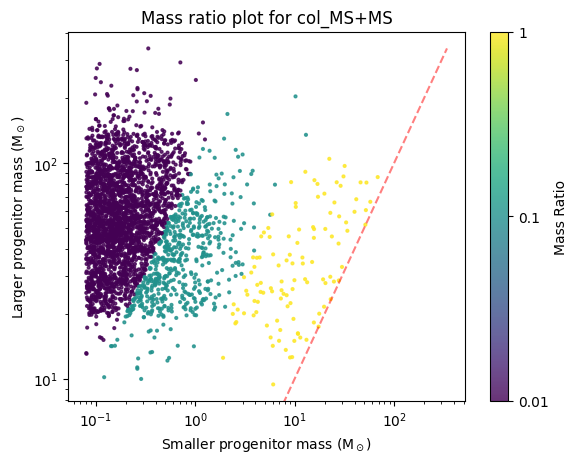

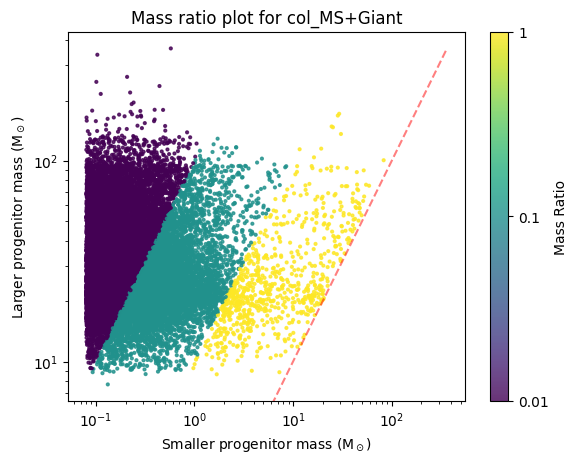

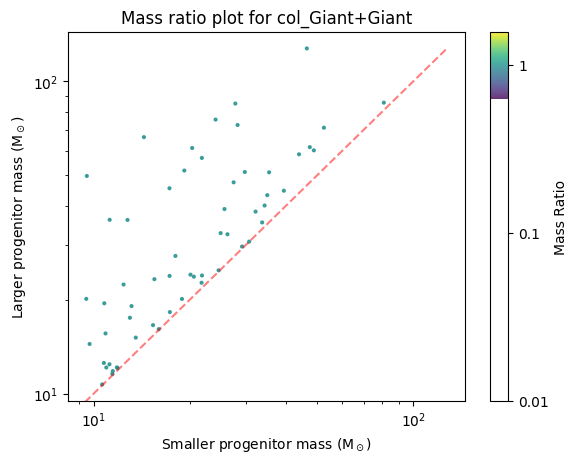

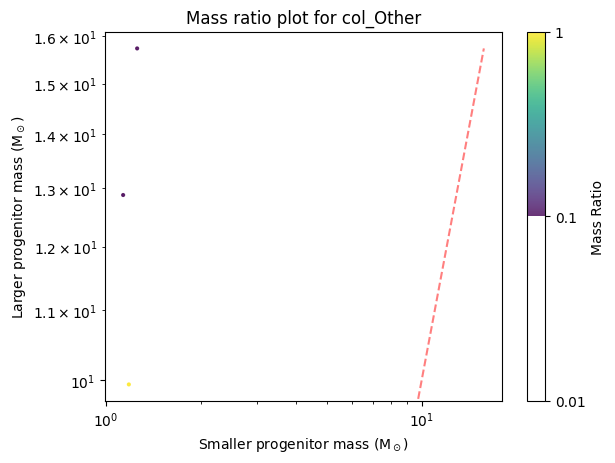

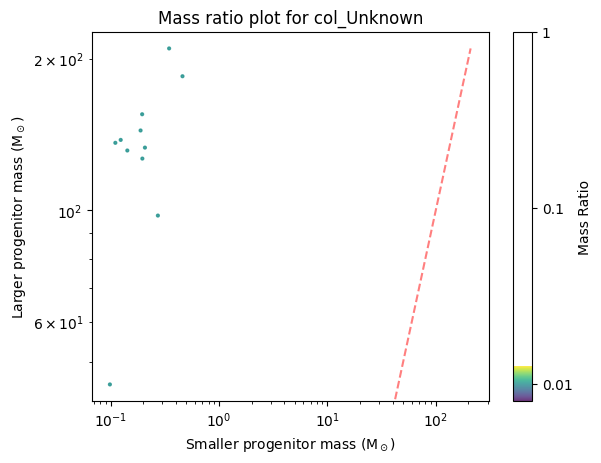

In [34]:
for name in names:
    col_plot = groups[name].copy()
    plt.figure()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['q'].cat.codes, cmap='viridis', alpha=.8, s=4)
    
    maxi = col_plot['larger_mass'].max()
    plt.plot([0,maxi],[0,maxi],'r--',alpha=.5)
    
    # Create colorbar  labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    cb.set_ticks([0, 1, 2])  
    cb.set_ticklabels(['0.01', '0.1', '1'])
    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.show()


# groups plotted

## median line and point func def

In [35]:
def median_line(col_plot):
        median_mass_ratio_overall = col_plot['mass_ratio'].median()
        
        x_min = col_plot['smaller_mass'].min()
        x_max = col_plot['smaller_mass'].max()
        y_min = col_plot['larger_mass'].min()
        y_max = col_plot['larger_mass'].max()
        
        # Create x range for the line
        x_range = np.logspace(np.log10(x_min), np.log10(x_max), 100)
        y_line = x_range / median_mass_ratio_overall
        
        # LIMIT the line 
        mask = (y_line >= y_min) & (y_line <= y_max)
        x_line_limited = x_range[mask]
        y_line_limited = y_line[mask]
        
        plt.plot(x_line_limited, y_line_limited, 'k-', linewidth=2, label=f'Median Mass Ratio = {median_mass_ratio_overall:.3f}', zorder=4)

In [58]:
def median_point(df, color='red', label='Median ± 1σ', zorder=5):
    """Plot median point with error bars using standard deviation"""
    med_smaller = df['smaller_mass'].median()
    med_larger = df['larger_mass'].median()
    std_smaller = df['smaller_mass'].std()
    std_larger = df['larger_mass'].std()
    
    plt.errorbar(med_smaller, med_larger, 
                 xerr=std_smaller, yerr=std_larger,
                 fmt='o', color=color, ecolor=color, 
                 elinewidth=2, capsize=4, markersize=8,
                 label=label, zorder=zorder)
    
# def median_point(df, color='black', label='Median ± IQR', zorder=5):
#     med_smaller = df['smaller_mass'].median()
#     med_larger = df['larger_mass'].median()
#     #using quartiles since std tends to get distorted in the graph
#     q25_smaller = df['smaller_mass'].quantile(0.25)
#     q75_smaller = df['smaller_mass'].quantile(0.75)
#     q25_larger = df['larger_mass'].quantile(0.25)
#     q75_larger = df['larger_mass'].quantile(0.75)

#     xerr_lower = med_smaller - q25_smaller
#     xerr_upper = q75_smaller - med_smaller
#     yerr_lower = med_larger - q25_larger
#     yerr_upper = q75_larger - med_larger

#      # Print the median and error bar values
#     print(f"Smaller mass median: {med_smaller:.3f}, Lower error: {xerr_lower:.3f}, Upper error: {xerr_upper:.3f}")
#     print(f"Larger mass median: {med_larger:.3f}, Lower error: {yerr_lower:.3f}, Upper error: {yerr_upper:.3f}")

#     plt.errorbar(med_smaller, med_larger, 
#                     xerr=[[xerr_lower], [xerr_upper]], 
#                     yerr=[[yerr_lower], [yerr_upper]],
#                     fmt='o', color=color, ecolor=color, 
#                     elinewidth=2, capsize=4, markersize=8,
#                     label=label, zorder=zorder)



## overall median group plots

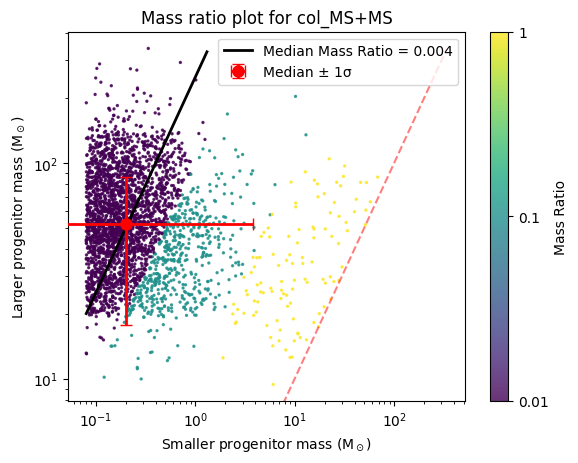

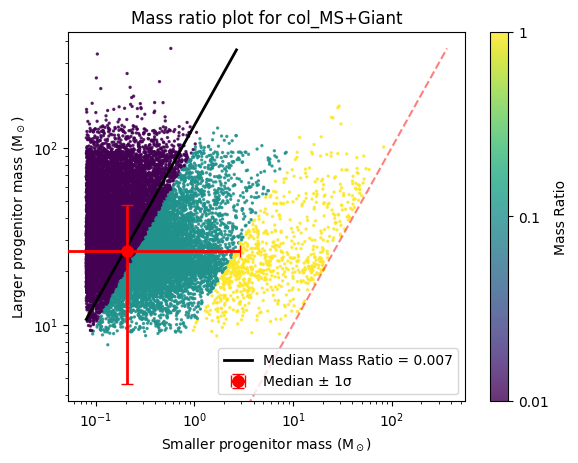

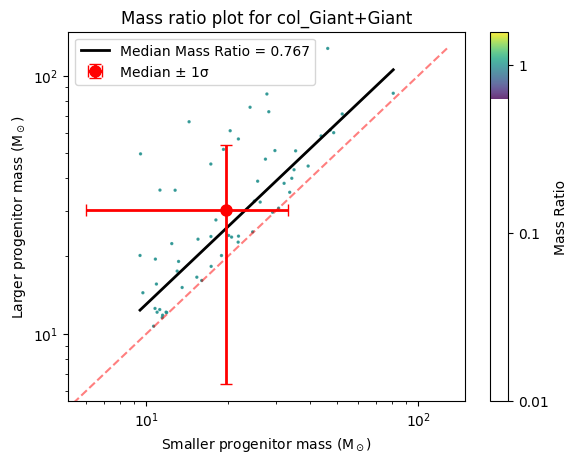

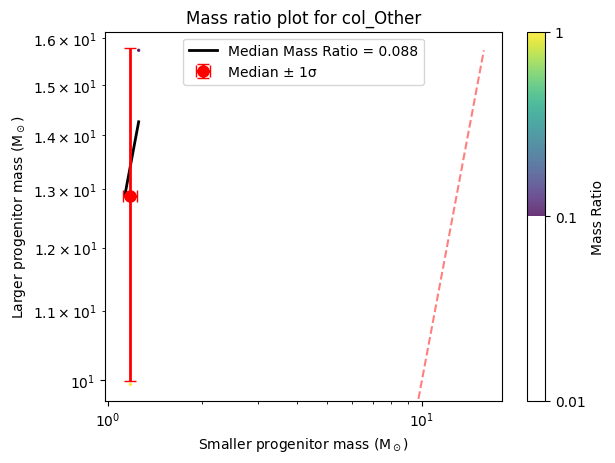

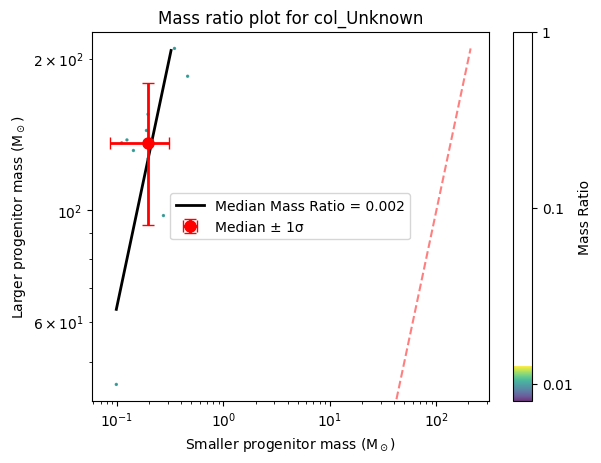

In [59]:

for name in names:
    col_plot = groups[name].copy()
    plt.figure()
    col_plot = col_plot.reset_index()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['q'].cat.codes, cmap='viridis', alpha=.8, s=2)
    
    maxi = col_plot['larger_mass'].max()
    plt.plot([0,maxi],[0,maxi],'r--',alpha=.5)
    
    # Create colorbar labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    cb.set_ticks([0, 1, 2])  
    cb.set_ticklabels(['0.01', '0.1', '1'])

        
    #making over all median line and pont
    median_line(col_plot)
    median_point(col_plot, color='red')




    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.legend()
    plt.show()


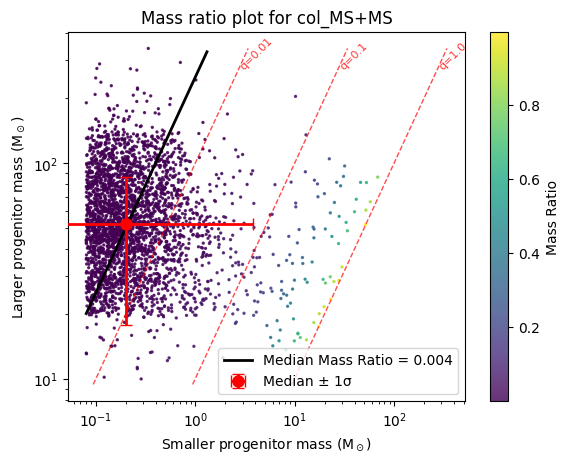

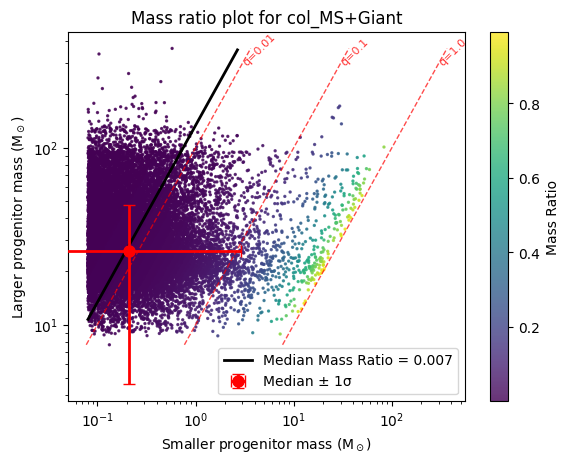

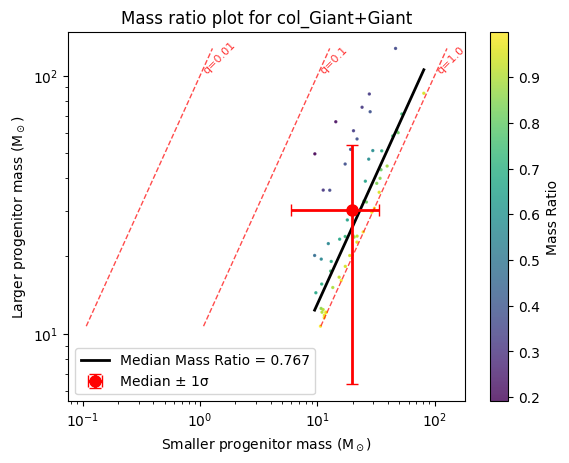

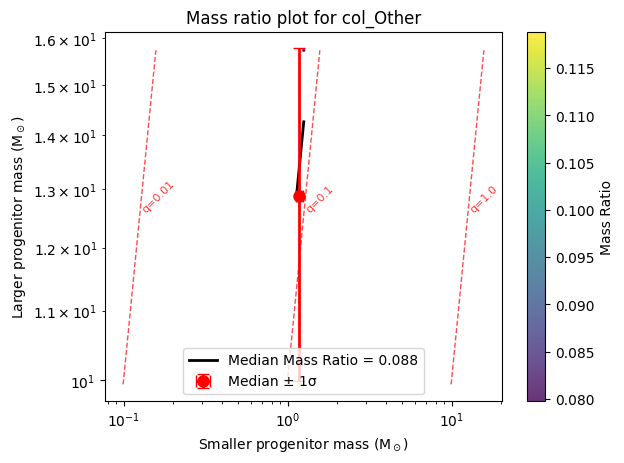

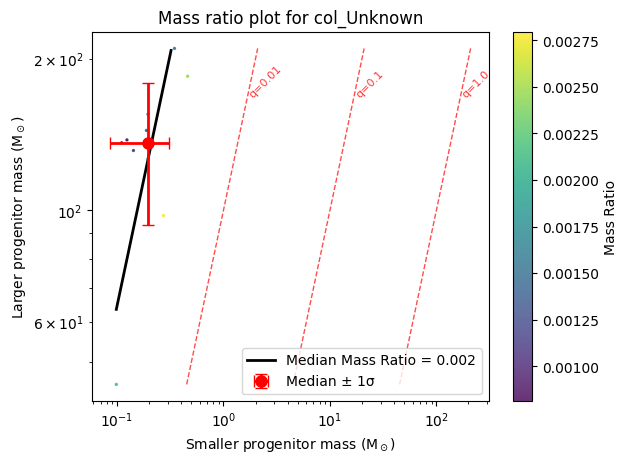

In [60]:
for name in names:
    col_plot = groups[name].copy()
    plt.figure()
    col_plot = col_plot.reset_index()
    
    # Color directly using mass_ratio column
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['mass_ratio'], cmap='viridis', alpha=.8, s=2)
    
    # Get the range for drawing mass ratio lines
    maxi = col_plot['larger_mass'].max()
    mini = col_plot['larger_mass'].min()
    
    # Create mass ratio lines at different thresholds
    mass_ratios = [0.01, 0.1, 1.0]
    larger_mass_range = np.linspace(mini, maxi, 100)
    
    for ratio in mass_ratios:
        smaller_mass_line = ratio * larger_mass_range
        plt.plot(smaller_mass_line, larger_mass_range, 'r--', alpha=0.7, linewidth=1)
    
    # Add labels for the mass ratio lines
    for ratio in mass_ratios:
        # Position label at a reasonable point on each line
        label_larger_mass = maxi * 0.8  # Position at 80% of max
        label_smaller_mass = ratio * label_larger_mass
        plt.text(label_smaller_mass, label_larger_mass, f'q={ratio}', 
                rotation=45, color='red', fontsize=8, alpha=0.8)
    
    # Create colorbar with continuous mass ratio values
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    
    # Making overall median line and point
    median_line(col_plot)
    median_point(col_plot, color='red')
    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.legend()
    plt.show()


# group median plots 

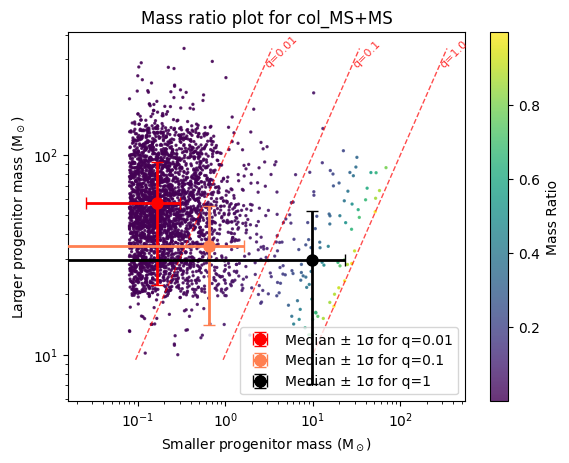

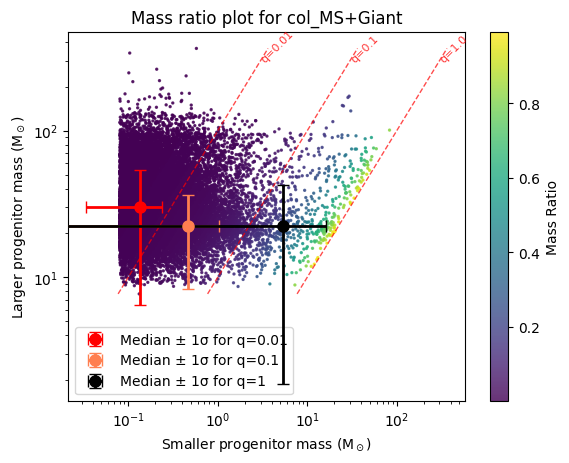

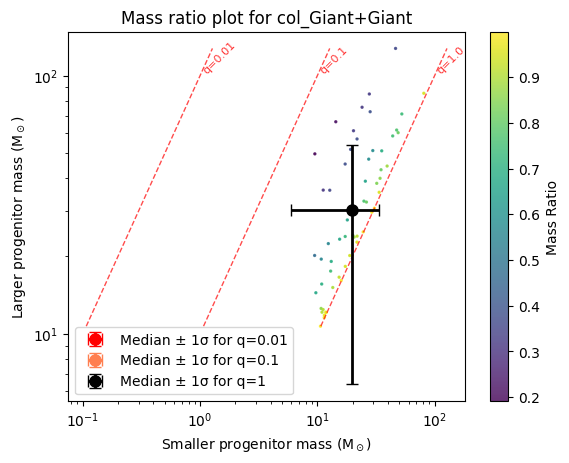

In [61]:
for name in names[:3]:
    col_plot = groups[name].copy()
    plt.figure()
    col_plot = col_plot.reset_index()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['mass_ratio'], cmap='viridis', alpha=.8, s=2)




        # Get the range for drawing mass ratio lines
    maxi = col_plot['larger_mass'].max()
    mini = col_plot['larger_mass'].min()
    
    # Create mass ratio lines at different thresholds
    mass_ratios = [0.01, 0.1, 1.0]
    larger_mass_range = np.linspace(mini, maxi, 100)
    
    for ratio in mass_ratios:
        smaller_mass_line = ratio * larger_mass_range
        plt.plot(smaller_mass_line, larger_mass_range, 'r--', alpha=0.7, linewidth=1)
    
    # Add labels for the mass ratio lines
    for ratio in mass_ratios:
        # Position label at a reasonable point on each line
        label_larger_mass = maxi * 0.8  # Position at 80% of max
        label_smaller_mass = ratio * label_larger_mass
        plt.text(label_smaller_mass, label_larger_mass, f'q={ratio}', 
                rotation=45, color='red', fontsize=8, alpha=0.8)
        

    
    # Create colorbar labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')


    # Making overall median line
    # median_line(col_plot)
    
    # Plot separate median points for each category
    colors = ['red', 'coral', 'black']  # Different colors for each category
    for i, category in enumerate(['0.01', '0.1', '1']):
        category_data = col_plot[col_plot['q'] == category]
        median_point(category_data, 
                    color=colors[i], 
                    label=f'Median ± 1σ for q={category}', 
                    zorder=6)
    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.legend()
    plt.show()


# plotting bh masses for each group

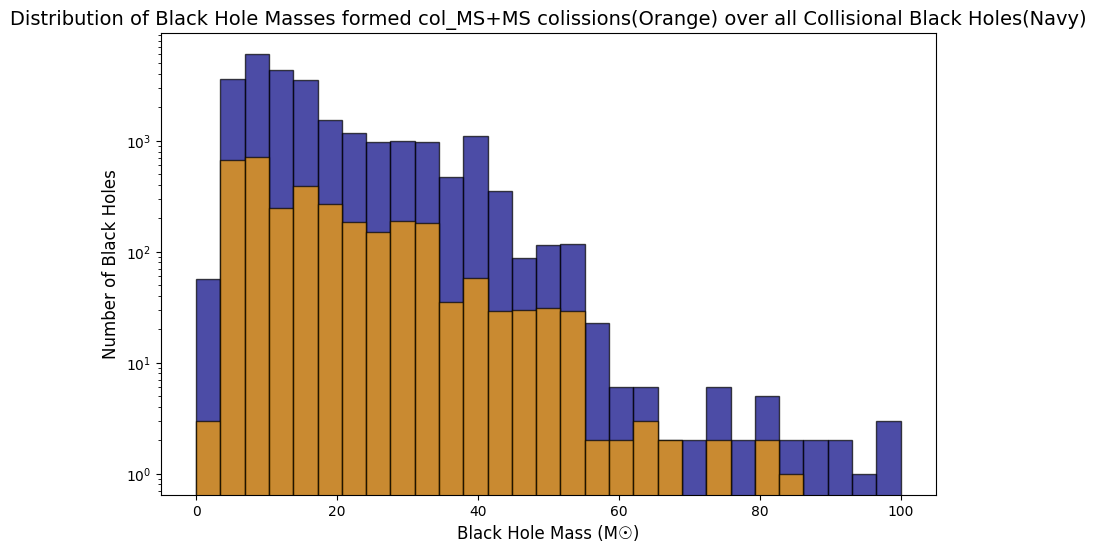

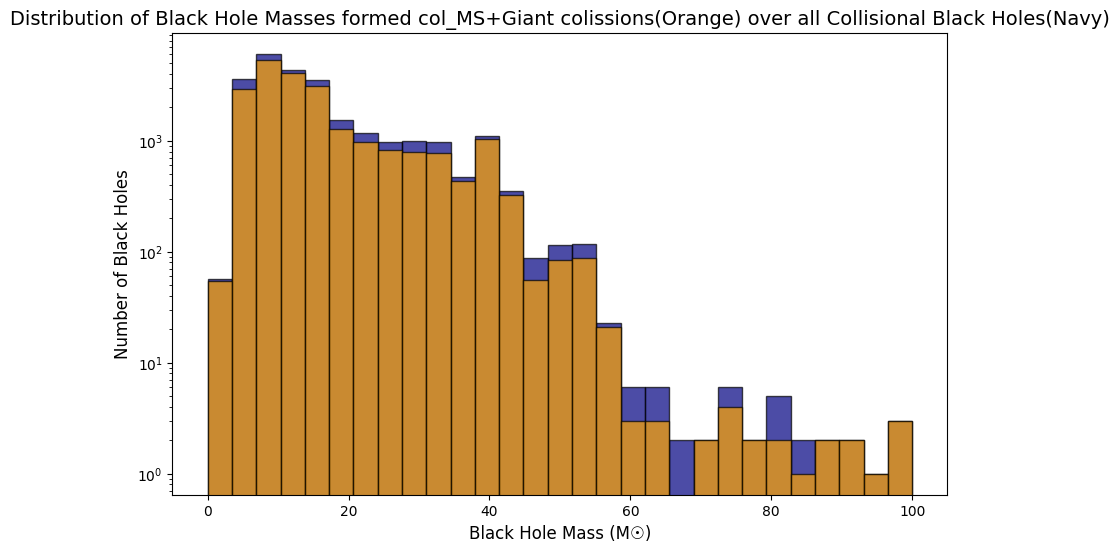

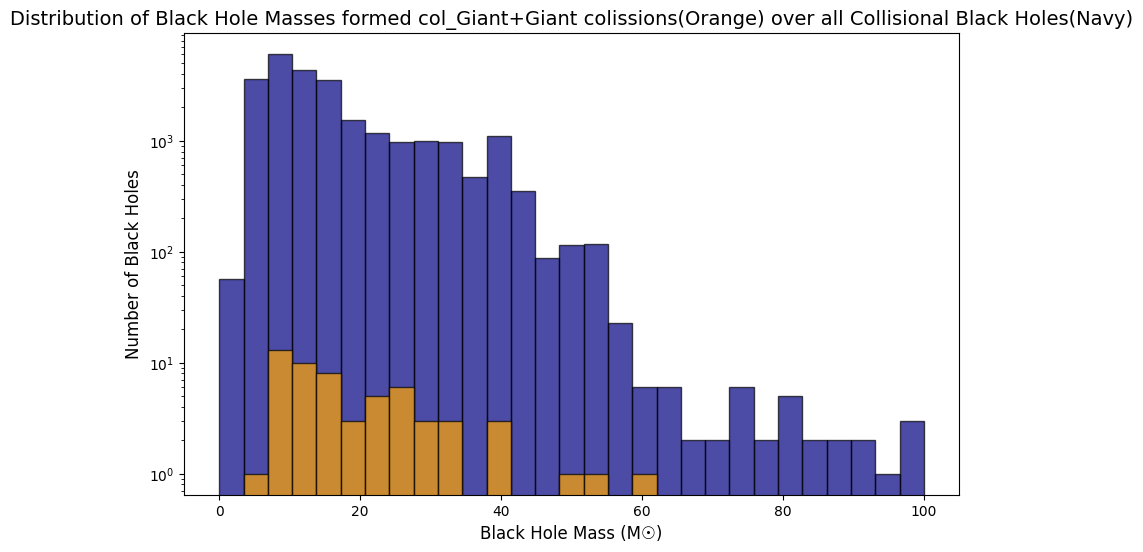

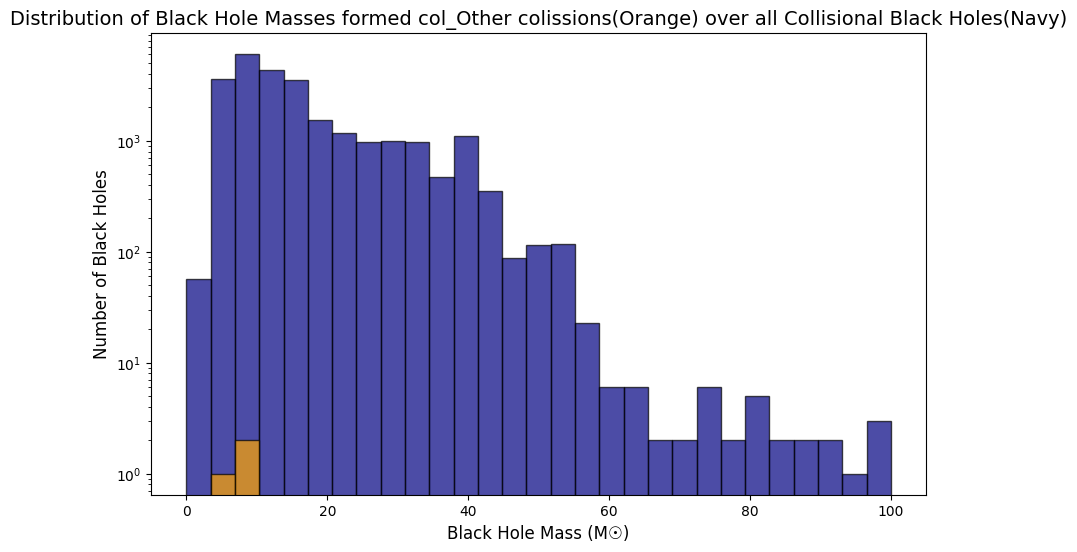

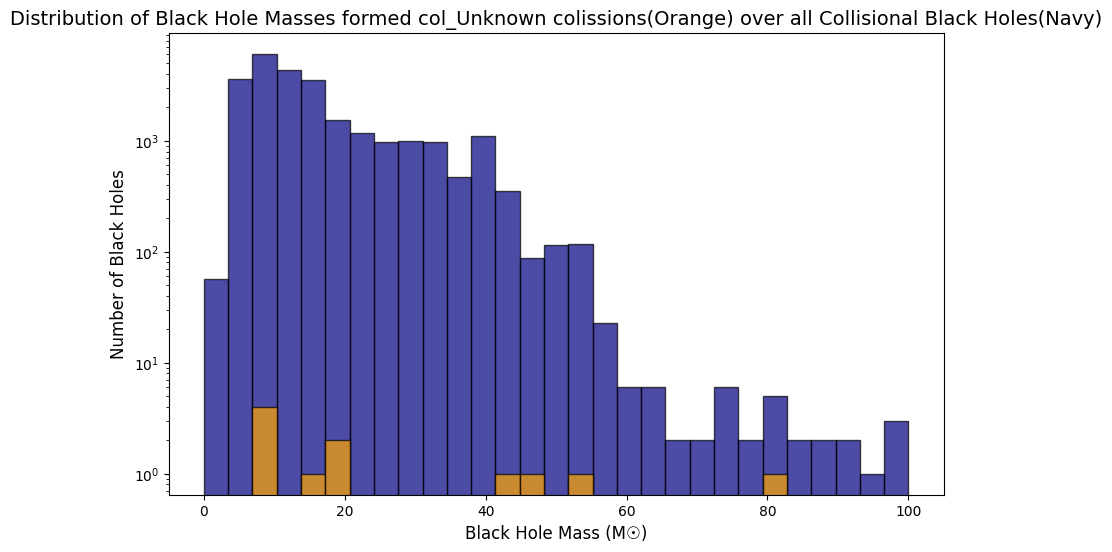

In [57]:

for name in names:
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 100, 30)  # Create bins upto 100 m sun
    plt.hist(col['bh_mass'], bins=bins, color='navy', alpha=0.7, edgecolor='black')
    plt.xlabel('Black Hole Mass (M☉)', fontsize=12)
    plt.ylabel('Number of Black Holes', fontsize=12)
    plt.title(f'Distribution of Black Hole Masses formed {name} colissions(Orange) over all Collisional Black Holes(Navy)', fontsize=14)
    col_bh_0= groups[name]
    bins2 = np.linspace(0, 100, 30)  # Create bins upto 100 m sun
    plt.hist(col_bh_0['bh_mass'], bins=bins2, color='orange', alpha=0.7, edgecolor='black')
    plt.yscale('log')
    plt.show()

# testing code

In [41]:
col_test=groups[names[0]]


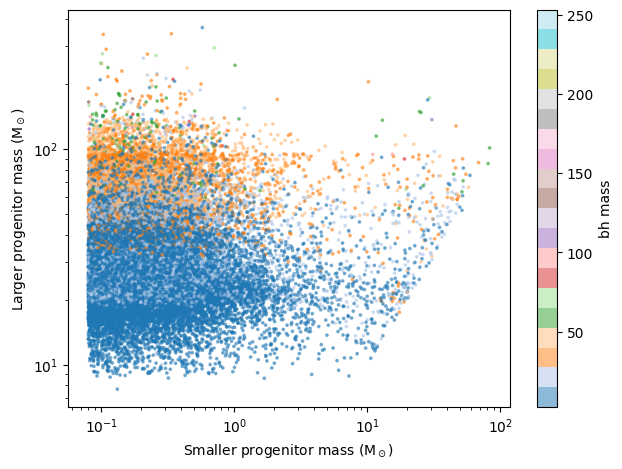

In [42]:
#PLOTTING UNLABELLED COLISIONS
col_plot = ag_col_bh.copy()
col_plot = col_plot.sort_values('time_x',ascending=False)[3:] #dropping the 3 100Myr+ events

plt.figure()
sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], c=col_plot['bh_mass'], cmap='tab20', alpha=.5, s=3)
plt.xlabel('Smaller progenitor mass (M$_\odot$)')
plt.ylabel('Larger progenitor mass (M$_\odot$)')
plt.yscale('log')
plt.xscale('log')

cb = plt.colorbar(sc); cb.set_label('bh mass')
plt.tight_layout()
plt.show()

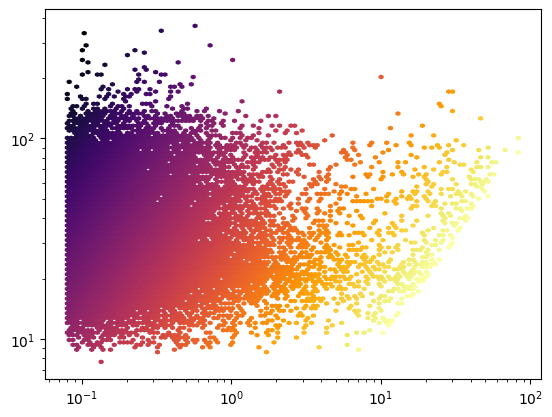

In [43]:
plt.hexbin(col_plot['smaller_mass'], col_plot['larger_mass'],C=np.log10(col_plot['mass_ratio']),
           gridsize=120,cmap='inferno',xscale='log',yscale='log')